In [405]:
import csv 
import pandas as pd 
import numpy as np
import collections
pd.set_option('display.max_columns', None)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [427]:
#dftrain = pd.read_csv('2020-train.csv')
df = pd.read_csv('2020-train.csv')
df

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,0,1,93.008102,-1.990750,-0.364950,1995.780029,-150.653000,1:00,5.97789,0.221744,6.45304,-12.477000,18.268900,9.389410,3.050340,0.555689,86.024200,-4.37258,1.429580,0.404622,-0.059343,55,6.03322,FA,InPlay,42fce2f6
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,3,2,97.935898,-2.916730,-2.695220,2388.689941,-170.166000,12:15,6.18328,2.123090,6.37298,-10.453700,18.147200,2.899330,2.612840,-0.111897,89.458199,-4.90467,-2.148410,0.385719,-2.148680,55,6.23380,FA,InPlay,3e9cda86
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,3,1,81.831398,-1.576020,1.045500,1966.949951,159.830994,11:15,6.12413,-1.294740,6.13114,-23.592199,17.337099,-6.186090,2.634610,-0.937995,75.593597,-6.00728,-0.122044,0.463953,1.300450,55,6.14750,CH,BallCalled,f129a6cd
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,1,2,83.775703,-0.387083,-0.613163,2539.459961,54.268398,7:45,6.58357,1.665380,5.59444,-49.169498,-8.342350,-10.586200,2.174090,0.233674,76.396400,-9.50640,-2.581980,0.458471,-1.659590,55,6.60043,CU,InPlay,03e9bc05
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,2,1,91.208000,0.140618,-4.035290,2409.110107,246.348999,2:15,4.77355,1.495840,6.12665,-24.760099,8.488800,19.890600,2.846400,-0.703636,83.215302,-4.53233,-0.268188,0.415965,-1.526170,55,4.77332,FA,StrikeCalled,48feb675
5,98f8936a,Right,a58e31f3,Right,9b5daeaf,0dad94e8,68d1111a,7,2,0.0,2,2,87.095802,-1.765940,-2.663060,1964.719971,264.998993,2:45,5.78114,2.075490,5.78314,-34.840801,1.982270,18.361601,1.202610,1.173050,80.265404,-8.24794,0.780148,0.438111,-2.075230,55,5.79080,CH,StrikeSwinging,419540c7
6,28e273c4,Left,9a2db1f2,Right,d0d69f32,caf1f50b,4fedda83,3,1,1.0,3,2,97.071701,-2.224720,3.411580,2270.479980,137.667999,10:30,6.08352,-2.663860,6.36303,-13.328100,16.047800,-14.320900,2.745180,-0.712306,87.948799,-4.76645,0.696210,0.390590,2.569990,55,6.09316,FA,StrikeSwinging,cf85249d
7,4f3062b6,Left,7e2bb9a9,Right,c9712626,33bb973b,20bf9444,6,1,1.0,1,2,82.397301,-2.152430,4.069960,2372.100098,322.580994,4:45,6.20321,-2.466780,6.02752,-43.678398,-2.624990,3.282180,0.474190,1.571470,76.352798,-10.25710,4.681720,0.464021,2.497290,55,6.22659,SL,BallCalled,c9423da3
8,afae9816,Left,ffe7832e,Left,d0d69f32,f88d09f4,4fedda83,2,1,1.0,0,0,86.299400,-1.344580,3.599910,1904.939941,154.160004,11:00,5.89500,-2.529400,6.35454,-18.394899,18.750099,-8.748260,2.979320,0.024554,78.281097,-4.85101,1.945590,0.440157,2.559950,55,5.91159,FA,FoulBall,51ad39b4
9,61ab8c67,Right,daa1322d,Right,f682daed,c4c41d26,41ac8158,4,1,1.0,3,2,94.156303,-3.388980,-2.308930,2086.100098,224.160004,1:30,6.52740,0.886049,5.47456,-14.501100,17.073700,14.586700,2.095660,-0.054626,86.078400,-6.09955,0.425454,0.411268,-0.876224,55,6.53540,FA,FoulBall,b89e4ec3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582205 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             582205 non-null object
pitcher_side           582205 non-null object
batter_id              582205 non-null object
batter_side            582205 non-null object
stadium_id             582205 non-null object
umpire_id              582205 non-null object
catcher_id             582205 non-null object
inning                 582205 non-null int64
top_bottom             582205 non-null int64
outs                   582053 non-null float64
balls                  582205 non-null int64
strikes                582205 non-null int64
release_speed          582093 non-null float64
vert_release_angle     582093 non-null float64
horz_release_angle     582093 non-null float64
spin_rate              573194 non-null float64
spin_axis              582093 non-null float64
tilt                   580953 non-null object
rel_height             582093 non-null float64
rel_side    

In [428]:
#df[pd.isnull(df).any(axis=1)]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571516 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             571516 non-null object
pitcher_side           571516 non-null object
batter_id              571516 non-null object
batter_side            571516 non-null object
stadium_id             571516 non-null object
umpire_id              571516 non-null object
catcher_id             571516 non-null object
inning                 571516 non-null int64
top_bottom             571516 non-null int64
outs                   571516 non-null float64
balls                  571516 non-null int64
strikes                571516 non-null int64
release_speed          571516 non-null float64
vert_release_angle     571516 non-null float64
horz_release_angle     571516 non-null float64
spin_rate              571516 non-null float64
spin_axis              571516 non-null float64
tilt                   571516 non-null object
rel_height             571516 non-null float64
rel_side    

In [442]:
#Verifying text categories don't have outliers
#collections.Counter(df['pitcher_id']).most_common()
collections.Counter(df['catcher_id']).most_common()
#collections.Counter(df['umpire_id']).most_common()
#collections.Counter(df['batter_id']).most_common()
#collections.Counter(df['stadium_id']).most_common()
#collections.Counter(df['pitcher_side']).most_common()
#collections.Counter(df['batter_side']).most_common()
#collections.Counter(df['tilt']).most_common()  ----  remove
#collections.Counter(df['pitch_call']).most_common() -- remove
#collections.Counter(df['pitch_id']).most_common()  -- Remove, all individual
#collections.Counter(df['pitch_type']).most_common()

[('9c6cbb5e', 14297),
 ('c338c856', 14141),
 ('a421b54b', 13173),
 ('b02267ef', 13155),
 ('5b8927f6', 12976),
 ('a3a2988b', 12931),
 ('fa18ff59', 12530),
 ('6e3a25a9', 12458),
 ('b05114c7', 12448),
 ('daa1322d', 11522),
 ('65ac286a', 11508),
 ('4fedda83', 11120),
 ('370c45c8', 10554),
 ('fbc0970f', 10552),
 ('30300714', 10010),
 ('054f7d9f', 9882),
 ('62542678', 9814),
 ('e4fac104', 9531),
 ('bbbfd290', 9287),
 ('568a8108', 9235),
 ('7678b2e4', 9161),
 ('3afe5e2f', 8968),
 ('41ac8158', 8948),
 ('ccd72da8', 8852),
 ('a126f66f', 8840),
 ('10874746', 8795),
 ('f06c9fdf', 8705),
 ('9db4e46f', 8307),
 ('23799071', 8215),
 ('0ae0de45', 8156),
 ('9d29b427', 7842),
 ('b1499101', 7264),
 ('44924919', 7211),
 ('e9aa50df', 7095),
 ('f0a5d54a', 7075),
 ('f93d6bd9', 7004),
 ('10b3ca78', 6921),
 ('15d7190f', 6771),
 ('20bf9444', 6666),
 ('cb4c8d71', 6374),
 ('ee5f8e23', 6314),
 ('75087ec8', 6257),
 ('ca270678', 6171),
 ('5e710b9e', 6062),
 ('00ae6fb5', 6055),
 ('4021b1a2', 6035),
 ('4f9cd7f9', 5739)

In [91]:
import collections
#collections.Counter(df['catcher_id'])
print ('Pitcher ids: {}'.format (df['pitcher_id'].nunique()))
print ('Stadium ids: {}'.format (df['stadium_id'].nunique()))
print ('Catcher ids: {}'.format (df['catcher_id'].nunique()))
print ('Umpire ids: {}'.format (df['umpire_id'].nunique()))
print ('Batter ids: {}'.format (df['batter_id'].nunique()))

Pitcher ids: 800
Stadium ids: 48
Catcher ids: 119
Umpire ids: 90
Batter ids: 994


In [81]:
#Checking numerical values
df.describe()

,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55
count,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.000000,571439.0,571439.000000
mean,5.013312,1.490635,0.982647,0.886275,0.889516,88.830795,-1.523177,-1.010778,2220.418613,181.453505,5.919822,0.754120,6.100290,-26.537798,9.207831,2.034781,2.252168,-0.033318,81.344349,-6.494786,-0.621708,0.429291,-0.760119,55.0,5.943929
std,2.680638,0.499913,0.817280,0.968046,0.825162,5.901375,1.458067,2.763400,311.965095,65.828935,0.518803,1.988046,0.493073,13.492844,8.861789,10.510825,0.946797,0.863265,5.271424,1.891453,2.225927,0.032156,2.012531,0.0,0.524067
min,1.000000,1.000000,0.000000,0.000000,0.000000,41.396500,-10.605200,-9.101000,362.382996,0.037000,1.005030,-5.518970,1.612180,-171.931000,-68.846298,-32.847698,-3.510870,-6.803380,38.572899,-17.125799,-11.180300,0.355875,-5.072390,55.0,1.076910
25%,3.000000,1.000000,0.000000,0.000000,0.000000,84.729698,-2.511560,-3.055165,2072.709961,140.388504,5.664300,-1.250225,5.782720,-34.027149,4.289665,-6.515085,1.645890,-0.625641,77.881203,-7.653985,-2.181025,0.405313,-2.220170,55.0,5.687095
50%,5.000000,1.000000,1.000000,1.000000,1.000000,90.144203,-1.668630,-1.896470,2238.219971,195.792007,5.958590,1.549460,6.106680,-22.877800,11.178500,3.314600,2.258340,-0.037729,82.494301,-6.241880,-0.749132,0.420584,-1.565130,55.0,5.984280
75%,7.000000,2.000000,2.000000,2.000000,2.000000,93.348900,-0.703914,1.327385,2400.510010,225.095497,6.243020,2.198180,6.424965,-15.825900,16.204599,11.111250,2.867470,0.557239,85.289803,-5.132610,0.790570,0.448401,1.270670,55.0,6.268760
max,18.000000,2.000000,2.000000,3.000000,2.000000,105.052002,15.231100,9.358300,3752.239990,359.984009,8.750060,4.984060,10.070200,97.565002,132.962006,51.857899,18.021900,12.040800,96.798401,16.200701,9.884520,1.008390,5.582150,55.0,9.209940


In [429]:
#Remove 'outs =3' values, balls = 4 values, 
df = df[df['outs']!=3]
df = df[df['balls']!=4]

In [83]:
df[df['spin_axis']<0]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id


In [430]:
df['spin_axis'] = [i + 360 if i <0 else i for i in df['spin_axis'] ]

In [350]:
#df[['x55','rel_side','horz_release_angle','release_speed','zone_time', 'zone_speed','induced_vert_break','vert_break']]
df[['tilt','spin_axis']]

,tilt,spin_axis
0,1:00,209.347000
1,12:15,189.834000
2,11:15,159.830994
3,7:45,54.268398
4,2:15,246.348999
5,2:45,264.998993
6,10:30,137.667999
7,4:45,322.580994
8,11:00,154.160004
9,1:30,224.160004


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571439 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             571439 non-null object
pitcher_side           571439 non-null object
batter_id              571439 non-null object
batter_side            571439 non-null object
stadium_id             571439 non-null object
umpire_id              571439 non-null object
catcher_id             571439 non-null object
inning                 571439 non-null int64
top_bottom             571439 non-null int64
outs                   571439 non-null float64
balls                  571439 non-null int64
strikes                571439 non-null int64
release_speed          571439 non-null float64
vert_release_angle     571439 non-null float64
horz_release_angle     571439 non-null float64
spin_rate              571439 non-null float64
spin_axis              571439 non-null float64
tilt                   571439 non-null object
rel_height             571439 non-null float64
rel_side    

In [87]:
#Redefine pitch calls
#ball (0): BallCalled, HitByPitch, BallIntentional
#strike(1): StrikeCalled, StrikeSwinging, InPlay, FoulBall 

'''A pitch ruled a hit by pitch is recorded as a ball in the pitcher's pitch count, since by 
definition the ball must be outside the strike zone and not have been swung at. The rule awarding 
first base to a batter hit by a pitch was instituted in 1887.
'''

'''If the pitch results in a batted ball, the pitch counts as a strike(for purposes of a pitcher’s 
ball/strike pitch count), even if the pitch was out of the strike zone and would have been called a ball 
if the batter had taken (not swung at) the pitch.

The rationale is that if the pitch was close enough to the strike zone to intice the batter to swing, the 
pitcher gets credit for having thrown a strike.

Similarly, the pitcher is credited with a strike pitch if the batter hits a foul ball on a two-strike 
count, even though the foul ball is not the third strike on the batter (unless it was bunted foul).'''

'If the pitch results in a batted ball, the pitch counts as a strike(for purposes of a pitcher’s \nball/strike pitch count), even if the pitch was out of the strike zone and would have been called a ball \nif the batter had taken (not swung at) the pitch.\n\nThe rationale is that if the pitch was close enough to the strike zone to intice the batter to swing, the \npitcher gets credit for having thrown a strike.\n\nSimilarly, the pitcher is credited with a strike pitch if the batter hits a foul ball on a two-strike \ncount, even though the foul ball is not the third strike on the batter (unless it was bunted foul).'

In [431]:
# 1 = strike, 0 = ball
df['ball_strike'] = np.where(df['pitch_call'].isin (['HitByPitch','BallCalled','BallIntentional']), 0 , 1)

In [432]:
df.drop(columns=['pitch_call', 'y55','pitch_id','tilt'], inplace=True)

In [397]:
df.head(10)

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,z55,pitch_type,ball_strike
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,0,1,93.008102,-1.990750,-0.364950,1995.780029,209.347000,5.97789,0.221744,6.45304,-12.477000,18.268900,9.389410,3.05034,0.555689,86.024200,-4.37258,1.429580,0.404622,-0.059343,6.03322,FA,1
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,3,2,97.935898,-2.916730,-2.695220,2388.689941,189.834000,6.18328,2.123090,6.37298,-10.453700,18.147200,2.899330,2.61284,-0.111897,89.458199,-4.90467,-2.148410,0.385719,-2.148680,6.23380,FA,1
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,3,1,81.831398,-1.576020,1.045500,1966.949951,159.830994,6.12413,-1.294740,6.13114,-23.592199,17.337099,-6.186090,2.63461,-0.937995,75.593597,-6.00728,-0.122044,0.463953,1.300450,6.14750,CH,0
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,1,2,83.775703,-0.387083,-0.613163,2539.459961,54.268398,6.58357,1.665380,5.59444,-49.169498,-8.342350,-10.586200,2.17409,0.233674,76.396400,-9.50640,-2.581980,0.458471,-1.659590,6.60043,CU,1
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,2,1,91.208000,0.140618,-4.035290,2409.110107,246.348999,4.77355,1.495840,6.12665,-24.760099,8.488800,19.890600,2.84640,-0.703636,83.215302,-4.53233,-0.268188,0.415965,-1.526170,4.77332,FA,1
5,98f8936a,Right,a58e31f3,Right,9b5daeaf,0dad94e8,68d1111a,7,2,0.0,2,2,87.095802,-1.765940,-2.663060,1964.719971,264.998993,5.78114,2.075490,5.78314,-34.840801,1.982270,18.361601,1.20261,1.173050,80.265404,-8.24794,0.780148,0.438111,-2.075230,5.79080,CH,1
6,28e273c4,Left,9a2db1f2,Right,d0d69f32,caf1f50b,4fedda83,3,1,1.0,3,2,97.071701,-2.224720,3.411580,2270.479980,137.667999,6.08352,-2.663860,6.36303,-13.328100,16.047800,-14.320900,2.74518,-0.712306,87.948799,-4.76645,0.696210,0.390590,2.569990,6.09316,FA,1
7,4f3062b6,Left,7e2bb9a9,Right,c9712626,33bb973b,20bf9444,6,1,1.0,1,2,82.397301,-2.152430,4.069960,2372.100098,322.580994,6.20321,-2.466780,6.02752,-43.678398,-2.624990,3.282180,0.47419,1.571470,76.352798,-10.25710,4.681720,0.464021,2.497290,6.22659,SL,0
8,afae9816,Left,ffe7832e,Left,d0d69f32,f88d09f4,4fedda83,2,1,1.0,0,0,86.299400,-1.344580,3.599910,1904.939941,154.160004,5.89500,-2.529400,6.35454,-18.394899,18.750099,-8.748260,2.97932,0.024554,78.281097,-4.85101,1.945590,0.440157,2.559950,5.91159,FA,1
9,61ab8c67,Right,daa1322d,Right,f682daed,c4c41d26,41ac8158,4,1,1.0,3,2,94.156303,-3.388980,-2.308930,2086.100098,224.160004,6.52740,0.886049,5.47456,-14.501100,17.073700,14.586700,2.09566,-0.054626,86.078400,-6.09955,0.425454,0.411268,-0.876224,6.53540,FA,1


In [7]:
df.pitch_call.unique()

array(['InPlay', 'BallCalled', 'StrikeCalled', 'StrikeSwinging',
       'FoulBall', 'HitByPitch', 'BallIntentional'], dtype=object)

In [441]:
collections.Counter(df['ball_strike']).most_common()

#sum(df['ball_strike'])/df.shape[0]

[(1, 364171), (0, 207268)]

In [ ]:
#Imbalanced data set.  Let's remove strike calls to get it balanced

In [420]:
df1 = df[df['ball_strike']==1]
df1 = df1.sample(n = 207628)
df0 =  df[df['ball_strike']==0]
df = pd.concat([df1,df0])


In [399]:
collections.Counter(df['ball_strike']).most_common()

[(1, 207628), (0, 207268)]

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414896 entries, 390424 to 582204
Data columns (total 33 columns):
pitcher_id             414896 non-null object
pitcher_side           414896 non-null object
batter_id              414896 non-null object
batter_side            414896 non-null object
stadium_id             414896 non-null object
umpire_id              414896 non-null object
catcher_id             414896 non-null object
inning                 414896 non-null int64
top_bottom             414896 non-null int64
outs                   414896 non-null float64
balls                  414896 non-null int64
strikes                414896 non-null int64
release_speed          414896 non-null float64
vert_release_angle     414896 non-null float64
horz_release_angle     414896 non-null float64
spin_rate              414896 non-null float64
spin_axis              414896 non-null float64
rel_height             414896 non-null float64
rel_side               414896 non-null float64
extens

In [157]:
df.shape[0]

571439

In [238]:
X = df.loc[:,'outs':'z55']
y = df['ball_strike']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

In [171]:
#Only numerical values, no scaling

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lr_model_all = LogisticRegression()
lr_model_all.fit(X_train, y_train)
y_pred = lr_model_all.predict(X_test)

In [189]:
print('F1 Score:',f1_score(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))


F1 Score: 0.5510908119139012
Accuracy: 0.5546396722101711


In [190]:
print(confusion_matrix(y_test, y_pred))
y_score=lr_model_all.predict_proba(X_test)[:,1]


[[23340 18094]
 [18862 22684]]


Text(0,0.5,'TPR')

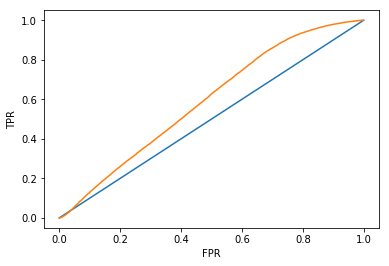

In [191]:
from sklearn.metrics import roc_curve, auc

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [108]:
#only numerical values, scaling

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
lr_model_all = LogisticRegression()
lr_model_all.fit(X_train, y_train)
y_pred = lr_model_all.predict(X_test)

print('F1 Score:',f1_score(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))

F1 Score: 0.5510908119139012
Accuracy: 0.5546396722101711


[[23340 18094]
 [18862 22684]]


Text(0,0.5,'TPR')

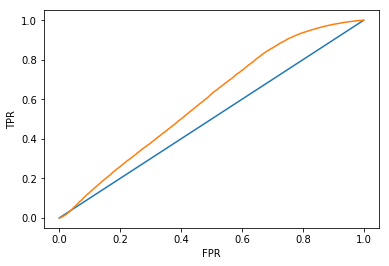

In [194]:
print(confusion_matrix(y_test, y_pred))
y_score=lr_model_all.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [219]:
dfhot = pd.get_dummies(df['batter_id'], prefix='batter')

In [325]:
# 1 = top, 0 = rest
df['catcher_id'] = np.where(df['catcher_id'].isin (['dc18f830','4fedda83', 'ee5f8e23']), 1 , 0)

In [327]:
df['catcher_id'].value_counts()

0    401355
1     13541
Name: catcher_id, dtype: int64

In [227]:
X = dfhot
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

In [228]:
print(X_train.shape, y_train.shape, y_test.shape, X_test.shape)

(331916, 977) (331916,) (82980,) (82980, 977)


F1 Score: 0.5000440645104434
Accuracy: 0.5214389009399856
[[23410 18024]
 [21687 19859]]


Text(0,0.5,'TPR')

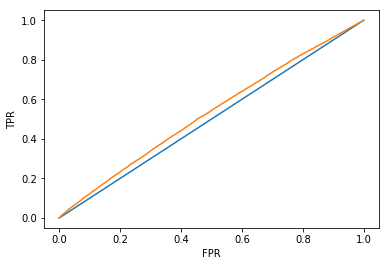

In [230]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('F1 Score:',f1_score(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))
y_score=lr.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['batter','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,batter,Coef
646,batter_ad84b429,0.012359
51,batter_0e9cc95b,0.008646
571,batter_97e44625,0.008348
451,batter_76fa7b0e,0.007529
833,batter_dcca3a30,0.007477
210,batter_370c45c8,0.007323
450,batter_76c0475e,0.007190
133,batter_23799071,0.007042
566,batter_96b2e717,0.006964
258,batter_4399bd03,0.006959


In [241]:
#only numeric values (scaled)
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['feature','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,feature,Coef
15,plate_side,0.273941
14,plate_height,0.194370
4,vert_release_angle,0.060083
17,vert_approach_angle,0.054949
5,horz_release_angle,0.039746
18,horz_approach_angle,0.038708
8,rel_height,0.028219
9,rel_side,0.027583
13,horz_break,0.026193
20,x55,0.026165


F1 Score: 0.8465588472390164
Accuracy: 0.8531935406121957
[[37193  4241]
 [ 7941 33605]]


Text(0,0.5,'TPR')

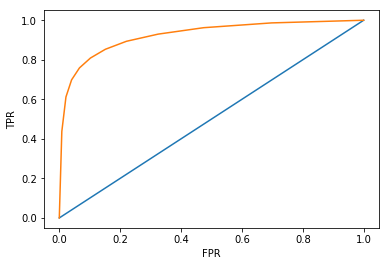

In [243]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [259]:
dfpit = pd.get_dummies(df['pitcher_id'], prefix='pitcher')

In [260]:
dfpit.shape

(414896, 799)

In [261]:
X = dfpit
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['batter','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,batter,Coef
159,pitcher_31ca0db5,0.013983
59,pitcher_13b6b4ac,0.012982
197,pitcher_42bf9b53,0.012213
407,pitcher_8797e2fa,0.011689
769,pitcher_f744bf62,0.010162
281,pitcher_5ad9d505,0.008896
132,pitcher_28e273c4,0.008339
631,pitcher_ceca1c03,0.007180
83,pitcher_1a3a9ba4,0.006891
180,pitcher_39f00f5d,0.006884


F1 Score: 0.5203122206995174
Accuracy: 0.5149072065557966
[[20896 20538]
 [19715 21831]]


Text(0,0.5,'TPR')

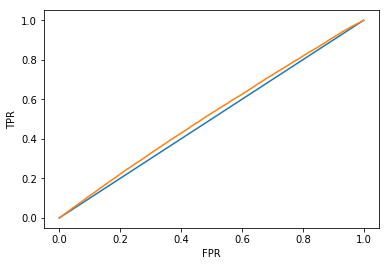

In [262]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [256]:
X.shape, y.shape

((414896, 119), (414896,))

In [268]:
dfcatch = pd.get_dummies(df['catcher_id'], prefix='catcher')
X = dfcatch
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['catcher','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,catcher,Coef
96,catcher_dc18f830,0.080088
35,catcher_4fedda83,0.042940
105,catcher_ee5f8e23,0.036115
77,catcher_b1499101,0.035013
107,catcher_f06c9fdf,0.034322
26,catcher_3c899258,0.033524
92,catcher_daa1322d,0.033319
71,catcher_a421b54b,0.027662
87,catcher_ccd72da8,0.025715
70,catcher_a3f6fd61,0.023668


F1 Score: 0.4743414079263722
Accuracy: 0.5099301036394311
[[23966 17468]
 [23198 18348]]


Text(0,0.5,'TPR')

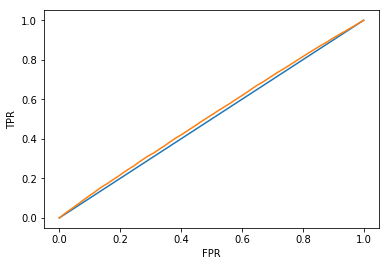

In [269]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [270]:
dfumpire = pd.get_dummies(df['umpire_id'], prefix='umpire')
X = dfumpire
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['catcher','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,catcher,Coef
44,umpire_7d853cf1,0.055136
69,umpire_bb6086e6,0.038407
22,umpire_4581c636,0.038343
34,umpire_5d1ac1d6,0.036599
10,umpire_16750c18,0.034807
45,umpire_7e01e89f,0.026977
4,umpire_0d8ba4bb,0.026618
24,umpire_478524f9,0.025449
77,umpire_c9752165,0.025374
81,umpire_d057fd71,0.024176


F1 Score: 0.5065349288951773
Accuracy: 0.5040491684743311
[[20704 20730]
 [20424 21122]]


Text(0,0.5,'TPR')

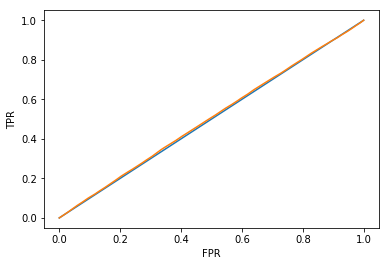

In [273]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [272]:
dfstadium = pd.get_dummies(df['stadium_id'], prefix='stadium')
X = dfstadium
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['stadium','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,stadium,Coef
40,stadium_d0d69f32,0.077033
27,stadium_a3f610ed,0.060366
16,stadium_6a69d99b,0.048041
11,stadium_43dd6efb,0.046824
46,stadium_f682daed,0.045556
3,stadium_0b15e1ca,0.040041
6,stadium_0faa3b2d,0.039991
26,stadium_9b5daeaf,0.031097
14,stadium_501b6728,0.030211
41,stadium_d0e0eb76,0.028078


F1 Score: 0.5049367994276175
Accuracy: 0.4996866714871053
[[20292 21142]
 [20374 21172]]


Text(0,0.5,'TPR')

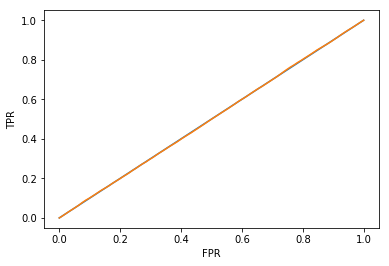

In [271]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [281]:
#all other categorical--fast to run
dfptype = pd.get_dummies(df['pitch_type'], prefix='pitch_type')
X = dfptype
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['pitch_type','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,pitch_type,Coef
2,pitch_type_FA,0.296798
1,pitch_type_CU,0.261772
3,pitch_type_SL,0.220830
0,pitch_type_CH,0.176054
4,pitch_type_XX,0.044546


F1 Score: 0.6195309831897696
Accuracy: 0.5166787177633164
[[10221 31213]
 [ 8893 32653]]


Text(0,0.5,'TPR')

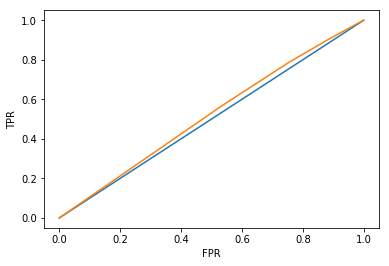

In [282]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [433]:
dfptype = pd.get_dummies(df['pitch_type'], prefix='pitch_type')
dfpside = pd.get_dummies(df['pitcher_side'], prefix='pitcher_side')
dfbside = pd.get_dummies(df['batter_side'], prefix='batter_side')
dfnum = df.loc[:,'outs':'z55']

In [434]:
dfcatch = pd.get_dummies(df['catcher_id'], prefix='catcher')

In [435]:
dfm3 = pd.concat([dfnum, dfpside,dfbside,dfptype], axis=1, sort=False)

In [374]:
dfm
rel height = z55
horizontal release angle = x55 = release side
release speed = zone time = zone speed
induced vertical break = vertical break
zone time = zone speed

,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,rel_height,rel_side,extension,vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,z55,pitcher_side_Left,pitcher_side_Right,batter_side_Left,batter_side_Right,pitch_type_CH,pitch_type_CU,pitch_type_FA,pitch_type_KN,pitch_type_SL,pitch_type_XX
288071,0.0,3,2,98.889702,-3.488600,-1.441740,2295.540039,199.317993,6.55271,0.446340,6.04538,-10.374200,6.371020,2.378480,-0.309189,88.953598,-5.45472,-0.239799,0.385040,-0.474315,6.58159,0,1,1,0,0,0,1,0,0,0
330094,0.0,2,2,96.363297,-0.263839,-3.313920,2323.179932,221.914001,4.70067,2.898850,6.41205,-15.984400,10.834100,3.058200,0.785528,88.107101,-3.30732,-1.271040,0.390998,-2.932230,4.71585,0,1,1,0,0,0,1,0,0,0
397136,2.0,0,0,86.613800,-0.670031,-3.200630,2228.110107,196.817001,5.74766,2.224690,5.95791,-24.964001,2.747490,2.911060,-0.567977,80.735298,-5.31716,-2.693420,0.437271,-2.227200,5.75655,0,1,1,0,0,0,0,0,1,0
365974,0.0,2,2,96.447998,-2.387400,-2.808710,2350.020020,200.498001,6.43911,2.052850,6.31148,-15.681300,4.630200,2.871140,-0.233254,88.231003,-5.36412,-1.933490,0.393305,-2.070700,6.47920,0,1,1,0,0,0,1,0,0,0
121152,1.0,1,1,90.281502,-1.547690,-2.202800,2168.189941,208.886993,6.09732,1.314670,5.69372,-14.900900,9.939640,3.311040,-0.094395,82.489799,-4.33567,-0.337755,0.421586,-1.303480,6.10036,0,1,1,0,0,0,1,0,0,0
405604,1.0,0,2,72.387497,0.483011,1.927360,2603.080078,334.713013,6.62012,-1.851610,5.84878,-68.991501,7.838470,1.338250,0.439600,65.672203,-12.43790,3.418280,0.533436,1.853680,6.62602,1,0,0,1,0,1,0,0,0,0
77595,1.0,0,0,86.047997,-1.386820,-3.514010,2012.989990,169.574997,5.17245,2.643710,5.07782,-29.602200,-0.745020,1.375560,-0.717517,78.149597,-6.84898,-3.649960,0.447724,-2.554050,5.17460,0,1,1,0,0,0,0,0,1,0
28067,0.0,1,0,87.265602,-2.645980,-1.791950,1683.959961,198.203995,6.12631,1.776190,6.46225,-19.944901,5.242320,2.069600,0.584723,79.385399,-6.43030,-0.795221,0.432128,-1.794550,6.17495,0,1,1,0,1,0,0,0,0,0
177917,2.0,1,1,85.136902,-0.239086,-3.830180,1863.650024,253.231995,5.80616,3.436900,5.13841,-37.393299,8.142820,2.614630,0.512209,77.328598,-7.13538,-2.321320,0.454466,-3.414110,5.81957,0,1,1,0,1,0,0,0,0,0
398082,0.0,1,0,88.673302,-1.484870,-2.522290,2055.949951,194.093994,5.72479,2.205790,6.63444,-19.572399,2.971270,2.755640,-0.022317,81.376404,-5.18765,-1.954230,0.420356,-2.235100,5.75072,0,1,0,1,0,0,1,0,0,0


In [ ]:
df

In [376]:

X = dfm
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)
                    

,features,Coef
14,plate_side,0.269691
13,plate_height,0.200029
16,vert_approach_angle,0.059673
4,vert_release_angle,0.055166
5,horz_release_angle,0.043222
17,horz_approach_angle,0.036464
19,x55,0.028139
9,rel_side,0.027842
11,vert_break,0.026731
12,horz_break,0.026150


In [385]:
dfm.drop(columns=['x55','rel_side'], inplace=True)

In [390]:
y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,features,Coef
13,plate_side,0.290864
12,plate_height,0.201280
15,vert_approach_angle,0.064183
4,vert_release_angle,0.064045
5,horz_release_angle,0.040716
16,horz_approach_angle,0.036094
10,vert_break,0.030203
8,rel_height,0.028799
18,z55,0.028475
7,spin_axis,0.027617


In [424]:
#not removing correlated

X = dfm2
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)
y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,features,Coef
15,plate_side,0.262953
14,plate_height,0.206822
4,vert_release_angle,0.057977
17,vert_approach_angle,0.047089
5,horz_release_angle,0.041861
18,horz_approach_angle,0.038988
9,rel_side,0.028914
20,x55,0.027515
12,induced_vert_break,0.025183
8,rel_height,0.024792


F1 Score: 0.8483934228390404
Accuracy: 0.8546637744034707
[[37176  4258]
 [ 7802 33744]]


Text(0,0.5,'TPR')

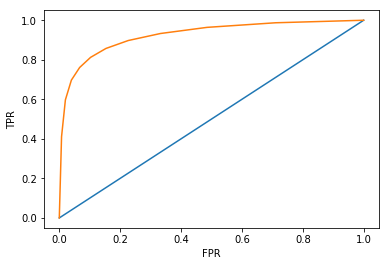

In [425]:
#not removing corr
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [436]:
#not removing correlated

X = dfm3
y = df['ball_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)
y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

table = list(zip(X,randomforest.feature_importances_))
dftable = pd.DataFrame(table, columns=['features','Coef'])
dftable.sort_values(by='Coef', ascending=False)

,features,Coef
15,plate_side,0.267400
14,plate_height,0.187880
17,vert_approach_angle,0.059986
4,vert_release_angle,0.055953
5,horz_release_angle,0.038191
18,horz_approach_angle,0.037381
20,x55,0.027651
9,rel_side,0.027546
8,rel_height,0.026752
21,z55,0.026536


F1 Score: 0.884047050943949
Accuracy: 0.8545779084418311
[[34311  7041]
 [ 9579 63357]]


Text(0,0.5,'TPR')

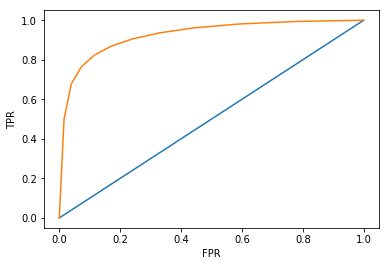

In [437]:
#not removing corr
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

F1 Score: 0.8466266923105932
Accuracy: 0.8529645697758496
[[37104  4330]
 [ 7871 33675]]


Text(0,0.5,'TPR')

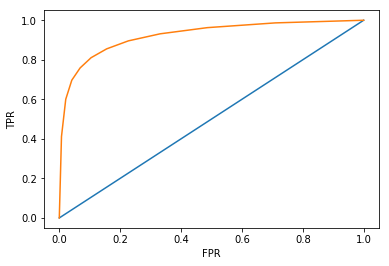

In [411]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

F1 Score: 0.8466266923105932
Accuracy: 0.8529645697758496
[[37104  4330]
 [ 7871 33675]]


Text(0,0.5,'TPR')

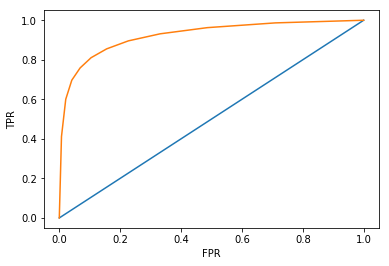

In [413]:
##dropping corr

print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=randomforest.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [388]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414896 entries, 288071 to 582204
Data columns (total 29 columns):
outs                   414896 non-null float64
balls                  414896 non-null int64
strikes                414896 non-null int64
release_speed          414896 non-null float64
vert_release_angle     414896 non-null float64
horz_release_angle     414896 non-null float64
spin_rate              414896 non-null float64
spin_axis              414896 non-null float64
rel_height             414896 non-null float64
extension              414896 non-null float64
vert_break             414896 non-null float64
horz_break             414896 non-null float64
plate_height           414896 non-null float64
plate_side             414896 non-null float64
zone_speed             414896 non-null float64
vert_approach_angle    414896 non-null float64
horz_approach_angle    414896 non-null float64
zone_time              414896 non-null float64
z55                    414896 non-null flo

In [333]:
X = dfm
y = df['ball_strike']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [335]:
#gbt = GradientBoostingClassifier()
#gbt.fit(X_train, y_train)
# = gbt.predict(X_train)
#= gbt.predict(X_test)


#print(classification_report (y_test,y_pred_test))
print (confusion_matrix(y_test,y_pred_test))
print('Train Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('Test Accuracy:',metrics.accuracy_score(y_test, y_pred_test))

[[36926  4508]
 [ 6861 34685]]
Train Accuracy: 0.8655623712023524
Test Accuracy: 0.8629910821884792


F1 Score: 0.8591882485539826
Accuracy: 0.8629910821884792
[[36926  4508]
 [ 6861 34685]]


Text(0,0.5,'TPR')

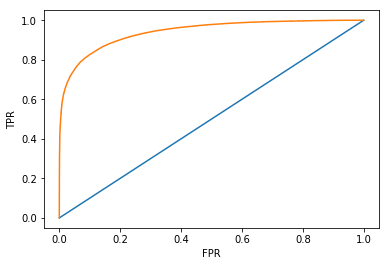

In [338]:
print('F1 Score:',f1_score(y_test, y_pred_test))
print('Accuracy:',accuracy_score(y_test,y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
y_score=gbt.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#print(fpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [406]:
gradient = GradientBoostingClassifier()
param_grid = {'n_estimators': [800,1000]}
scores = ['recall']

gbtg2 = GridSearchCV(gradient, param_grid=param_grid, scoring = scores, cv =10)
gbtg2.fit(X_train, y_train)
y_pred_train = gbtg2.predict(X_train)
y_pred_test= gbtg2.predict(X_test)

print("Best parameters set found on development set:")
print()
print(gbtg2.best_params_)
print()
print("Grid scores on development set:")
print()
means = gbtg2.cv_results_['mean_test_score']
stds = gbtg2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gbtg2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print(classification_report (y_test,y_pred_test))
print (confusion_matrix(y_test,y_pred_test))
print('Train Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('Test Accuracy:',metrics.accuracy_score(y_test, y_pred_test))

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

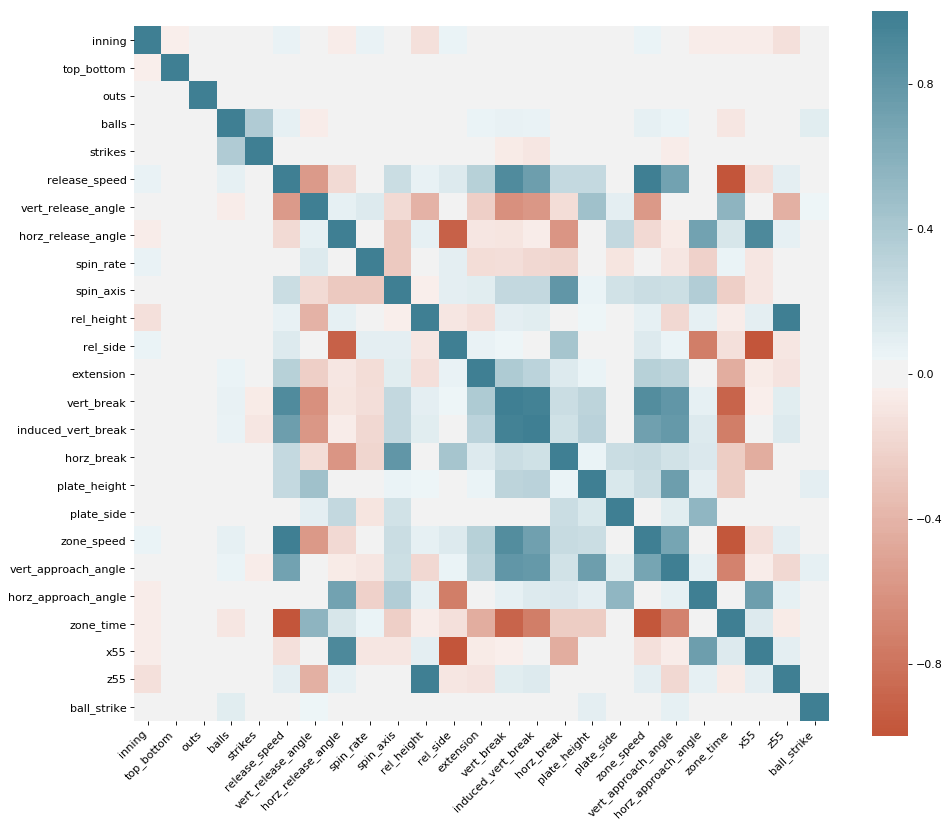

In [407]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [283]:
dfptype

,pitch_type_CH,pitch_type_CU,pitch_type_FA,pitch_type_SL,pitch_type_XX
390424,0,0,1,0,0
110855,0,1,0,0,0
1927,0,0,1,0,0
366347,0,0,1,0,0
181873,1,0,0,0,0
38,0,0,1,0,0
109621,0,0,1,0,0
495629,0,0,1,0,0
559029,0,0,1,0,0
136111,0,0,1,0,0


In [ ]:
rel height = z55
horizontal release angle = x55 = release side
release speed = zone time = zone speed
induced vertical break = vertical break
zone time = zone speed